In [1]:
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('/workspaces/ML-Zoomcamp-2025-Capstone-3/soil_with_crop_recommendations.csv')

In [3]:
df.head()

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status,rainfall,label,Soil_Type,Crop1,Crop2,Crop3
0,54:53.4,1.0,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress,NaN,NaN,Slightly Acidic,Rice,Maize,Groundnut
1,54:53.4,1.0,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress,NaN,NaN,Neutral,Wheat,Barley,Sugarcane
2,54:53.4,1.0,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress,NaN,NaN,Slightly Acidic,Rice,Maize,Groundnut
3,54:53.4,1.0,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress,NaN,NaN,Slightly Acidic,Rice,Maize,Groundnut
4,54:53.4,1.0,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress,NaN,NaN,Slightly Acidic,Rice,Maize,Groundnut


In [4]:
## Data Exploration

In [5]:
df.shape

(3400, 20)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1200 non-null   str    
 1   Plant_ID                1200 non-null   float64
 2   Soil_Moisture           1200 non-null   float64
 3   Ambient_Temperature     1200 non-null   float64
 4   Soil_Temperature        3400 non-null   float64
 5   Humidity                3400 non-null   float64
 6   Light_Intensity         1200 non-null   float64
 7   Soil_pH                 3400 non-null   float64
 8   Nitrogen_Level          3400 non-null   float64
 9   Phosphorus_Level        3400 non-null   float64
 10  Potassium_Level         3400 non-null   float64
 11  Chlorophyll_Content     1200 non-null   float64
 12  Electrochemical_Signal  1200 non-null   float64
 13  Plant_Health_Status     1200 non-null   str    
 14  rainfall                2200 non-null   float64
 15

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

Timestamp
<StringArray>
['54:53.4', '54:53.5', nan]
Length: 3, dtype: str
2

Plant_ID
[1. 2. 3. 4. 5.]
10

Soil_Moisture
[27.52110877 14.83556615 17.08636197 15.33615608 39.82221603]
1200

Ambient_Temperature
[22.24024536 21.70676328 21.18094556 22.59330194 28.92900106]
1200

Soil_Temperature
[21.90043536 18.68089194 15.39293913 22.7783939  18.10093728]
3400

Humidity
[55.2919039  63.94918051 67.83795649 58.19081101 63.77203577]
3400

Light_Intensity
[556.1728051 596.1367212 591.1246268 241.4124764 444.4938296]
1200

Soil_pH
[5.58195452 7.13570491 5.65685225 5.58452269 5.91970688]
3400

Nitrogen_Level
[10.00364972 30.712562   29.33700224 16.96662065 10.94496067]
1201

Phosphorus_Level
[45.80685203 25.3943926  27.57389185 26.18070481 37.89890673]
1317

Potassium_Level
[39.07619903 17.94482607 35.70653021 26.25774575 37.65448346]
1273

Chlorophyll_Content
[35.70300571 27.99329577 43.64630752 37.83809483 48.26581159]
1200

Electrochemical_Signal
[0.94140215 0.16489936 1.08172804 1.1860879

In [8]:
## Data Prep

In [9]:
# Fixing column names and values

In [10]:
df.columns = df.columns.str.lower()

categorical = list(df.dtypes[df.dtypes == 'str'].index)

for c in categorical:
    df[c] = df[c].str.lower()

In [11]:
# Removing unnecessary columns

In [12]:
df = df.drop(columns = ['timestamp', 'crop1', 'crop2', 'crop3'])

In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   plant_id                1200 non-null   float64
 1   soil_moisture           1200 non-null   float64
 2   ambient_temperature     1200 non-null   float64
 3   soil_temperature        3400 non-null   float64
 4   humidity                3400 non-null   float64
 5   light_intensity         1200 non-null   float64
 6   soil_ph                 3400 non-null   float64
 7   nitrogen_level          3400 non-null   float64
 8   phosphorus_level        3400 non-null   float64
 9   potassium_level         3400 non-null   float64
 10  chlorophyll_content     1200 non-null   float64
 11  electrochemical_signal  1200 non-null   float64
 12  plant_health_status     1200 non-null   str    
 13  rainfall                2200 non-null   float64
 14  label                   2200 non-null   str    
 15

<Axes: xlabel='plant_health_status', ylabel='Count'>

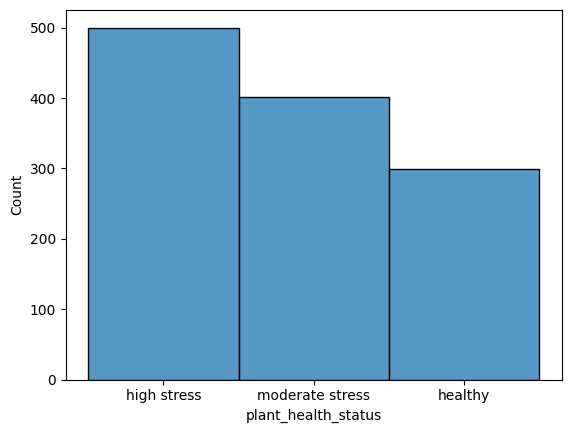

In [14]:
# Explore the target variable
sns.histplot(df.plant_health_status, bins=10)

In [15]:
# Mapping plant_health_status and soil_type values to int

In [16]:
plant_health_status_values = {
    'moderate stress': 1,
    'high stress': 2,
    'healthy': 0 
}

df.plant_health_status = df.plant_health_status.map(plant_health_status_values)

In [17]:
df['plant_health_status'].value_counts()

plant_health_status
2.0    500
1.0    401
0.0    299
Name: count, dtype: int64

In [18]:
soil_type_values = {
    'slightly acidic': 1, 
    'neutral': 2, 
    'alkaline': 3, 
    'acidic': 0 
}

df.soil_type = df.soil_type.map(soil_type_values)

In [19]:
df['soil_type'].value_counts()

soil_type
1    1663
2    1435
3     185
0     117
Name: count, dtype: int64

In [20]:
# Exploring label column

In [21]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [22]:
df[df['label']=='rice'].describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
plant_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soil_moisture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ambient_temperature,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soil_temperature,100.0,NaN,NaN,NaN,23.689332,2.031272,20.045414,21.927064,23.734837,25.513702,26.929951
humidity,100.0,NaN,NaN,NaN,82.272822,1.418381,80.122675,80.952094,82.189357,83.470254,84.969072
light_intensity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soil_ph,100.0,NaN,NaN,NaN,6.425471,0.768692,5.005307,5.869992,6.363804,7.039147,7.868475
nitrogen_level,100.0,NaN,NaN,NaN,90.0,0.0,90.0,90.0,90.0,90.0,90.0
phosphorus_level,100.0,NaN,NaN,NaN,47.58,7.904966,35.0,41.0,47.0,54.25,60.0
potassium_level,100.0,NaN,NaN,NaN,39.87,2.946167,35.0,38.0,40.0,42.0,45.0


In [23]:
df[df['label']=='lentil'].describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
plant_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soil_moisture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ambient_temperature,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soil_temperature,100.0,NaN,NaN,NaN,24.509052,3.320985,18.064861,21.724115,24.946835,27.431229,29.944139
humidity,100.0,NaN,NaN,NaN,64.804785,2.935461,60.091166,62.493027,64.094626,67.441228,69.923759
light_intensity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soil_ph,100.0,NaN,NaN,NaN,6.927932,0.549266,5.916454,6.485182,6.954178,7.394295,7.841496
nitrogen_level,100.0,NaN,NaN,NaN,90.0,0.0,90.0,90.0,90.0,90.0,90.0
phosphorus_level,100.0,NaN,NaN,NaN,68.36,7.335427,55.0,61.75,68.0,75.0,80.0
potassium_level,100.0,NaN,NaN,NaN,19.41,2.968164,15.0,17.0,19.0,22.0,25.0


In [24]:
# Removing label column as it has no correlation with the target variable

In [25]:
df = df.drop(columns = ['label'])

In [26]:
# Dealing with NaN values

In [27]:
df.isnull().sum()

plant_id                  2200
soil_moisture             2200
ambient_temperature       2200
soil_temperature             0
humidity                     0
light_intensity           2200
soil_ph                      0
nitrogen_level               0
phosphorus_level             0
potassium_level              0
chlorophyll_content       2200
electrochemical_signal    2200
plant_health_status       2200
rainfall                  1200
soil_type                    0
dtype: int64

In [28]:
df.dropna(subset=['plant_health_status'], inplace=True)

In [29]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   plant_id                1200 non-null   float64
 1   soil_moisture           1200 non-null   float64
 2   ambient_temperature     1200 non-null   float64
 3   soil_temperature        1200 non-null   float64
 4   humidity                1200 non-null   float64
 5   light_intensity         1200 non-null   float64
 6   soil_ph                 1200 non-null   float64
 7   nitrogen_level          1200 non-null   float64
 8   phosphorus_level        1200 non-null   float64
 9   potassium_level         1200 non-null   float64
 10  chlorophyll_content     1200 non-null   float64
 11  electrochemical_signal  1200 non-null   float64
 12  plant_health_status     1200 non-null   float64
 13  rainfall                0 non-null      float64
 14  soil_type               1200 non-null   int64  
dty

In [30]:
# Dropping rainfall column

In [31]:
df = df.drop(columns = ['rainfall'])

In [32]:
df.describe()

,plant_id,soil_moisture,ambient_temperature,soil_temperature,humidity,light_intensity,soil_ph,nitrogen_level,phosphorus_level,potassium_level,chlorophyll_content,electrochemical_signal,plant_health_status,soil_type
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,5.500000,25.106918,23.999130,19.957794,54.853165,612.637265,6.524102,30.106751,30.264484,30.112088,34.749591,0.987764,1.167500,1.519167
std,2.873479,8.677725,3.441561,2.932073,8.784916,228.318853,0.581755,11.514396,11.466846,11.668085,8.766995,0.575116,0.798942,0.499841
min,1.000000,10.000724,18.001993,15.003710,40.028758,200.615482,5.507392,10.003650,10.017690,10.000606,20.025511,0.002376,0.000000,1.000000
25%,3.000000,17.131893,21.101766,17.353027,47.019694,416.878983,6.026042,20.249774,20.894445,19.585561,27.463350,0.487982,1.000000,1.000000
50%,5.500000,25.168333,23.889044,19.911473,54.692069,617.240221,6.540524,30.138590,30.019385,30.495054,34.433427,0.981647,1.000000,2.000000
75%,8.000000,32.370231,27.042634,22.596851,62.451053,811.474690,7.030039,40.184737,40.131459,40.108296,42.232637,1.473142,2.000000,2.000000
max,10.000000,39.993164,29.990886,24.995929,69.968871,999.856261,7.497823,49.951136,49.980700,49.981945,49.990811,1.996116,2.000000,2.000000


In [33]:
df = df.reset_index(drop=True)

In [34]:
# Data correlation check

In [35]:
correlations = df.corr()['plant_health_status'].sort_values(ascending=False)
correlations

plant_health_status       1.000000
soil_ph                   0.039609
soil_type                 0.036857
plant_id                  0.031788
light_intensity           0.026331
electrochemical_signal    0.020962
ambient_temperature      -0.000692
chlorophyll_content      -0.007242
soil_temperature         -0.008938
potassium_level          -0.022879
humidity                 -0.044952
phosphorus_level         -0.058728
nitrogen_level           -0.269102
soil_moisture            -0.774851
Name: plant_health_status, dtype: float64

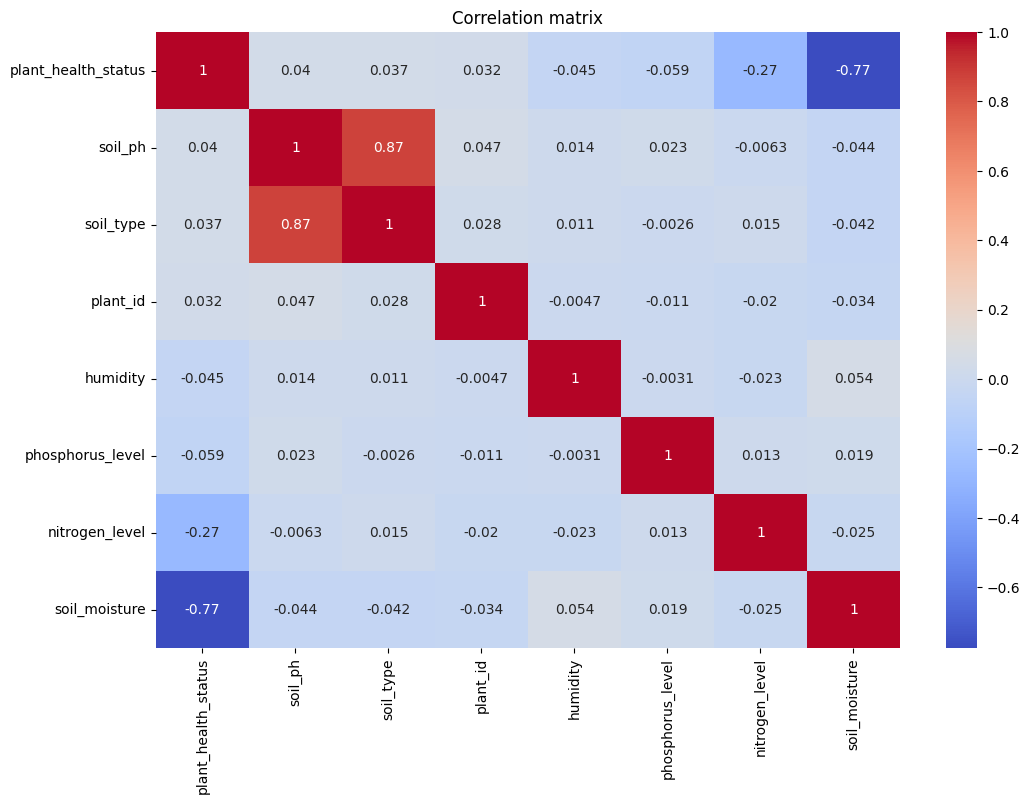

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[correlations[correlations.abs() > 0.03].index].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

In [37]:
### DecisionTreeClassifier
## Basic model focusing only on high correlation features

In [38]:
# Data preparation

In [39]:
features = ['soil_ph', 'humidity', 'phosphorus_level', 'soil_moisture', 'nitrogen_level']

In [40]:
X = df[features]

In [41]:
y = df['plant_health_status']

In [42]:
df_full = pd.concat([X, y], axis=1)

In [43]:
df_full_train, df_test = train_test_split(df_full, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

X_train = df_train.reset_index(drop=True)
X_val = df_val.reset_index(drop=True)
X_test = df_test.reset_index(drop=True)

y_train = df_train.plant_health_status.values
y_val = df_val.plant_health_status.values
y_test = df_test.plant_health_status.values

del X_train['plant_health_status']
del X_val['plant_health_status']
del X_test['plant_health_status']

In [49]:
# DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [51]:
# Evaluation

In [52]:
y_pred_dt = dt.predict(X_val)
print(f"Decision Tree Accuracy: {accuracy_score(y_val, y_pred_dt):.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred_dt))

Decision Tree Accuracy: 0.9958

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        67
         1.0       0.99      1.00      0.99        66
         2.0       1.00      0.99      1.00       107

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [53]:
## Simplifying the data input by substityting soil_ph for soil_type

In [54]:
soil_type_values = {
    1: 'slightly acidic', 
    2: 'neutral', 
    3: 'alkaline', 
    0: 'acidic' 
}

df.soil_type = df.soil_type.map(soil_type_values)

In [55]:
## Data preparation

In [56]:
features = ['soil_type', 'humidity', 'phosphorus_level', 'soil_moisture', 'nitrogen_level']
X = df[features]
y = df['plant_health_status']
df_full = pd.concat([X, y], axis=1)

In [57]:
df_full_train, df_test = train_test_split(df_full, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

y_train = df_train.plant_health_status.values
y_val = df_val.plant_health_status.values
y_test = df_test.plant_health_status.values

del df_train['plant_health_status']
del df_val['plant_health_status']
del df_test['plant_health_status']

In [58]:
### DecisionTreeClassifier with categorical values

In [59]:
# Encoding categorical values

In [60]:
train_dicts = df_train.to_dict(orient='records')

In [61]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [62]:
# Model

In [63]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [64]:
# Evaluation

In [65]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [66]:
y_pred_dt = dt.predict(X_val)
print(f"Decision Tree Accuracy: {accuracy_score(y_val, y_pred_dt):.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred_dt))

Decision Tree Accuracy: 0.9958

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        67
         1.0       0.99      1.00      0.99        66
         2.0       1.00      0.99      1.00       107

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [67]:
# Parameter tuning

In [68]:
scores = []

depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for d in depths: 
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred_dt = dt.predict(X_val)
    acc = accuracy_score(y_val, y_pred_dt)
    
    scores.append((d, acc))

In [69]:
df_scores = pd.DataFrame(scores, columns=['d', 'acc'])

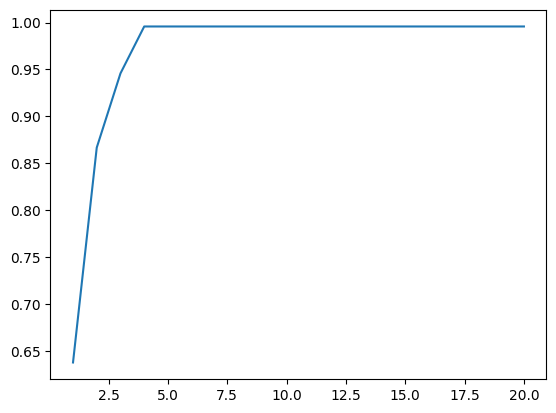

In [70]:
plt.plot(df_scores.d, df_scores.acc)

In [71]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred_dt = dt.predict(X_val)
        acc = accuracy_score(y_val, y_pred_dt)
    
        scores.append((d, s, acc))

In [72]:
columns = ['depth', 'min_samples_leaf', 'acc']
df_scores = pd.DataFrame(scores, columns=columns)

In [73]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['depth'], values=['acc'])
df_scores_pivot.round(3)

acc              
depth                 4      5      6
min_samples_leaf                     
1                 0.996  0.996  0.996
5                 0.996  0.996  0.996
10                0.996  0.996  0.996
15                0.996  0.996  0.996
20                0.996  0.996  0.996
100               0.838  0.838  0.838
200               0.867  0.867  0.867
500               0.446  0.446  0.446

In [74]:
### RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [75]:
# Evaluation
y_pred_rf = rf.predict(X_val)
print(f"Random Forest Accuracy: {accuracy_score(y_val, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

Random Forest Accuracy: 0.9958

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        67
         1.0       0.99      1.00      0.99        66
         2.0       1.00      0.99      1.00       107

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [76]:
features = list(dv.get_feature_names_out())

In [77]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

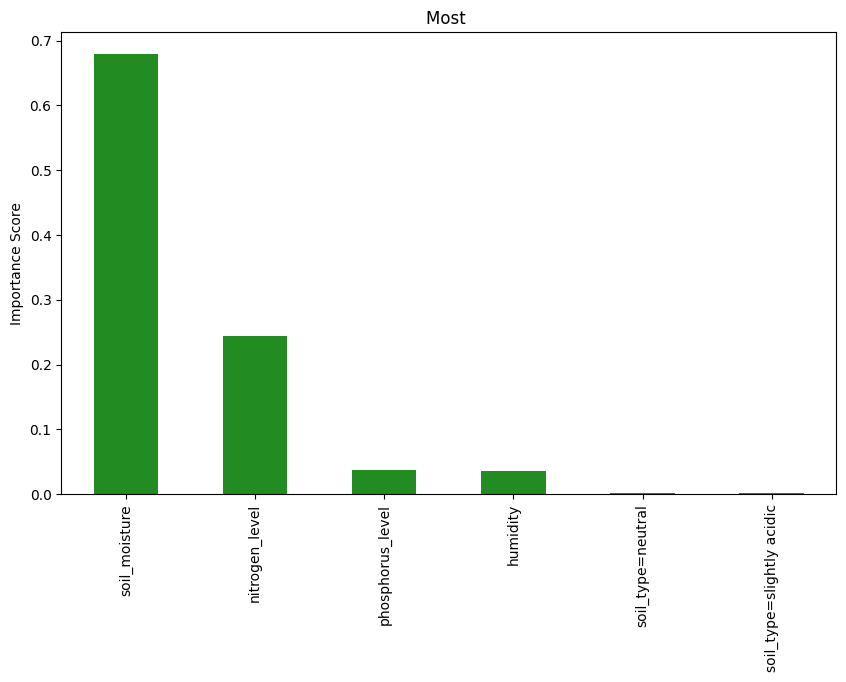

In [78]:
plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='forestgreen')
plt.title("Most ")
plt.ylabel("Importance Score")
plt.show()

In [79]:
# Parameter tuning

In [80]:
scores = []

for n in range(10, 20, 1):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_val)
    acc = accuracy_score(y_val, y_pred_rf)
    
    scores.append((n, acc))

In [81]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'acc'])

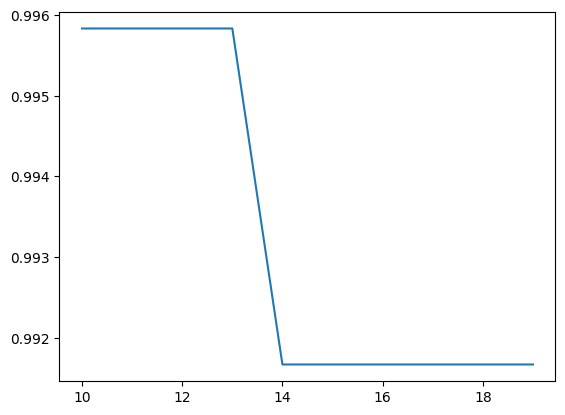

In [82]:
plt.plot(df_scores.n_estimators, df_scores.acc)

In [83]:
scores = []

for d in [3, 4, 5, 6]:
    for n in range(10, 20, 1):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred_rf = rf.predict(X_val)
        acc = accuracy_score(y_val, y_pred_rf)
    
        scores.append((d, n, acc))

In [84]:
columns = ['max_depth', 'n_estimators', 'acc']
df_scores = pd.DataFrame(scores, columns=columns)

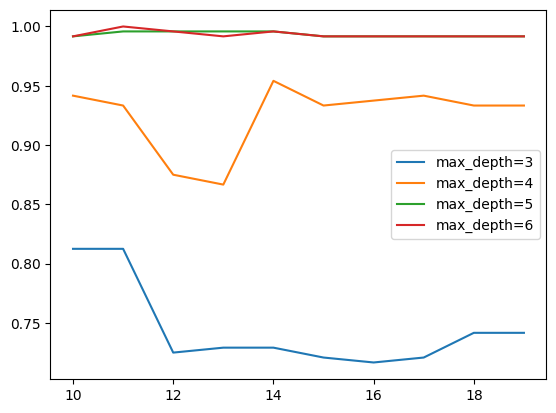

In [85]:
for d in [3, 4, 5, 6]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.acc,
             label='max_depth=%d' % d)

plt.legend()

In [86]:
max_depth = 5

In [87]:
scores = []

for s in [5, 10, 20, 30, 50]:
    for n in range(10, 20, 1):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=5,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred_rf = rf.predict(X_val)
        acc = accuracy_score(y_val, y_pred_rf)
    
        scores.append((s, n, acc))

In [88]:
columns = ['min_samples_leaf', 'n_estimators', 'acc']
df_scores = pd.DataFrame(scores, columns=columns)

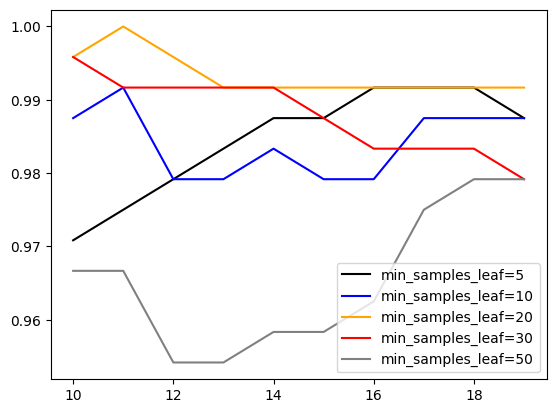

In [89]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [5, 10, 20, 30, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.acc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [90]:
min_samples_leaf = 20

In [91]:
rf = RandomForestClassifier(
    n_estimators=14,
    max_depth=5,
    min_samples_leaf = 20,
    class_weight='balanced',
    random_state=42, 
    n_jobs=-1
)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",14
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [92]:
# Evaluation on validation data
y_pred_rf = rf.predict(X_val)
print(f"Random Forest Accuracy: {accuracy_score(y_val, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

Random Forest Accuracy: 0.9583

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        67
         1.0       1.00      0.86      0.93        66
         2.0       1.00      0.99      1.00       107

    accuracy                           0.96       240
   macro avg       0.96      0.95      0.95       240
weighted avg       0.96      0.96      0.96       240



In [93]:
### Final DTC vs RF model

In [94]:
# Using full training data

In [95]:
features = ['soil_type', 'humidity', 'phosphorus_level', 'soil_moisture', 'nitrogen_level']

full_train_dict = df_full_train[features].to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)

test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

y_full_train = df_full_train.plant_health_status.values

In [96]:
## Final DecisionTreeClassifier

In [97]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)
dt.fit(X_full_train, y_full_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [98]:
y_pred_dt = dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9958

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        65
         1.0       0.99      1.00      0.99        90
         2.0       1.00      0.99      0.99        85

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [99]:
## Final RandomForestClassifier

In [102]:
rf = RandomForestClassifier(
    n_estimators=14,
    max_depth=5,
    min_samples_leaf = 20,
    class_weight='balanced',
    random_state=42, 
    n_jobs=-1
)

rf.fit(X_full_train, y_full_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",14
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [103]:
y_pred = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9917

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        65
         1.0       0.99      0.99      0.99        90
         2.0       1.00      0.99      0.99        85

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240



In [112]:
# Making a pipeline

In [104]:
pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)
)

In [106]:
pipeline.fit(full_train_dict, y_full_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('dictvectorizer', ...), ('decisiontreeclassifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"dtype dtype: dtype, default=np.float64The type of feature values. Passed to Numpy array/scipy.sparse matrixconstructors as the dtype argument.",<class 'numpy.float64'>
,"separator separator: str, default=""=""Separator string used when constructing new features for one-hotcoding.",'='
,"sparse sparse: bool, default=TrueWhether transform should produce scipy.sparse matrices.",True
,"sort sort: bool, default=TrueWhether ``feature_names_`` and ``vocabulary_`` should besorted when fitting.",True
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5


In [113]:
# Saving the model in a file

In [108]:
output_file = f'model.bin'

In [109]:
with open(output_file, 'wb') as f_out: 
    pickle.dump(pipeline, f_out)

In [111]:
with open('model.bin', 'rb') as f_in:
    pipeline = pickle.load(f_in)

In [114]:
# Testing the model

In [117]:
data = {
    'soil_type': 'slightly acidic',
    'humidity': 40.8466703,
    'phosphorus_level': 12.72414302,
    'soil_moisture': 14.43774938,
    'nitrogen_level': 45.51287735
}

In [119]:
X = dv.transform(data)

In [123]:
y_pred = int(dt.predict(X)[0])

In [124]:
health_status_map = {
    0: 'healthy',
    1: 'moderate stress',
    2: 'high stress'
}

In [126]:
result = health_status_map.get(y_pred, "unknown status")
result

'high stress'